# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## SETTING PARAMETERS

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15 
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#CFE5B4'

## EXPLORATORY DATA ANALYSIS AND CLEANING
Loading the dataset and checking the first five rows

In [3]:
df = pd.read_csv('world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
#taking out the columns which are useful for analysis
data_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [5]:
#copying data to new dataframe 
happy_df = df[data_columns].copy()

In [6]:
#renaming the columns
happy_df = df.rename(columns = {'Country name':'country_name', 'Regional indicator':'regional_indicator','Ladder score':'happiness_score','Logged GDP per capita':'gdp_per_capita','Social support':'social_support','Healthy life expectancy':'life_expectancy','Freedom to make life choices':'freedom_in_life_choices','Generosity':'generosity','Perceptions of corruption':'corruption'})

In [7]:
#checking for null values if exists
happy_df.isnull().sum()

country_name               0
regional_indicator         0
happiness_score            0
gdp_per_capita             0
social_support             0
life_expectancy            0
freedom_in_life_choices    0
generosity                 0
corruption                 0
dtype: int64

# Data Analysis & Visualization

Text(0, 0.5, 'GDP per capita')

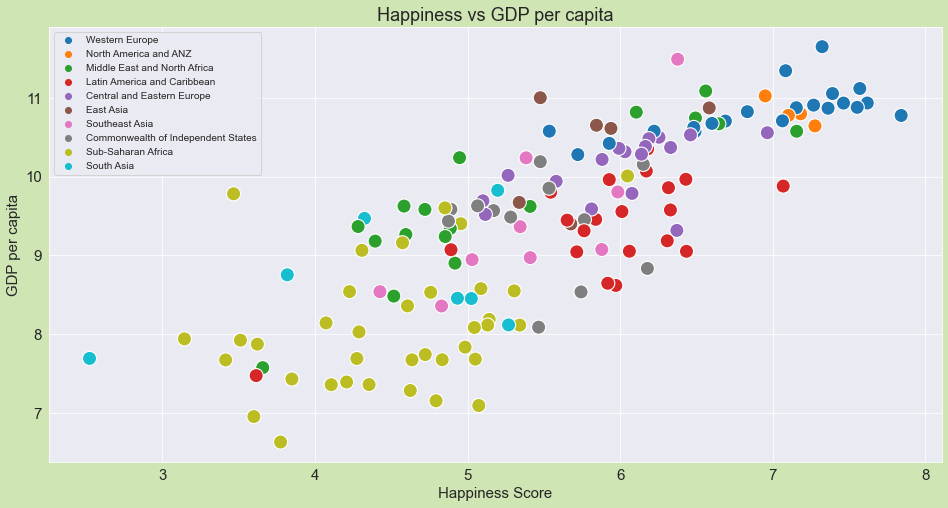

In [8]:
#plotting for happiness vs GDP
plt.rcParams['figure.figsize'] = (16,8)
plt.title('Happiness vs GDP per capita')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.gdp_per_capita, hue = happy_df.regional_indicator, s = 200)
plt.legend(loc = 'upper left', fontsize = 10)
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')



The scatter graph above shows the relationship between GDP per capita and the happiness score for different countries. It shows that more the per capita income of the country is greater is the happiness score. If we look towards the graph we can see that the per capita income of the Western Europe Region is more therefore the happiness score is also greater for that region and on the other hand it we can be see that Sub-Saharan Region has a lower per capita in comparison to other regions thereby expeiencing the lower happiness score. So from the above scatter plot we can conclude that the higher GDP per capita is directly related to Happiness score of a country.


In [9]:
#creating new variable to show regional GDP 
region_gdp = happy_df.groupby('regional_indicator')['gdp_per_capita'].sum()
region_gdp

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: gdp_per_capita, dtype: float64

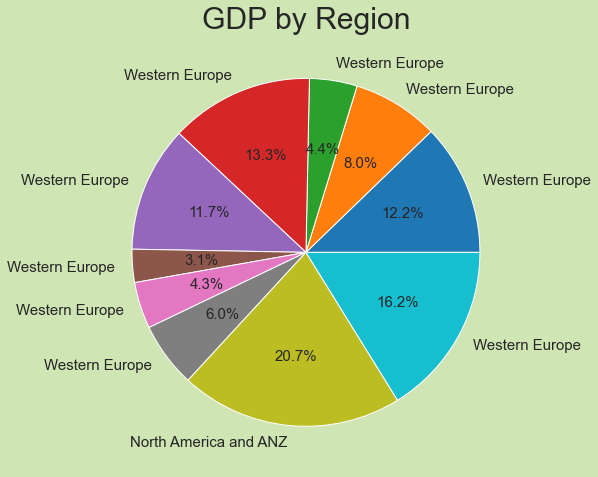

In [10]:
#plotting regional GDP
ax= region_gdp.plot.pie(y='gdp_per_capita', labels = happy_df['regional_indicator'], autopct = '%1.1f%%')
plt.title('GDP by Region', fontsize = 30)
ax.set_ylabel('')
plt.show()

The Pie chart above shows the per capita income of different regions. It can be seen that Sub-Saharan region which comprises of 36 countries which is highest amongst all other regions contributes the GDP of 20.7% being the highest, the Western Europe region comprising of 21 countries contributes a GDP of 16.2% being the second highest, the Latin-American and Caribbean region comprising of 20 countries contributes the GDP of 13.3% being the third highest. The North America and ANZ region comprising of 4 countries contributes the GDP of 3.1% which is the lowest amongst all the regions.

In [11]:
#creating new variable for storing total countries region-wise
total_country = happy_df.groupby('regional_indicator')[['country_name']].count()
total_country = total_country.sort_values(by='country_name', ascending=False)
total_country

,country_name
regional_indicator,
Sub-Saharan Africa,36
Western Europe,21
Latin America and Caribbean,20
Central and Eastern Europe,17
Middle East and North Africa,17
Commonwealth of Independent States,12
Southeast Asia,9
South Asia,7
East Asia,6


## Correlation Map
It measures the linear relationship between two variables and returns a value between -1 and 1. A value of -1 indicates a perfectly negative linear relationship, 0 indicates no linear relationship, and 1 indicates a perfectly positive linear relationship.

<AxesSubplot:>

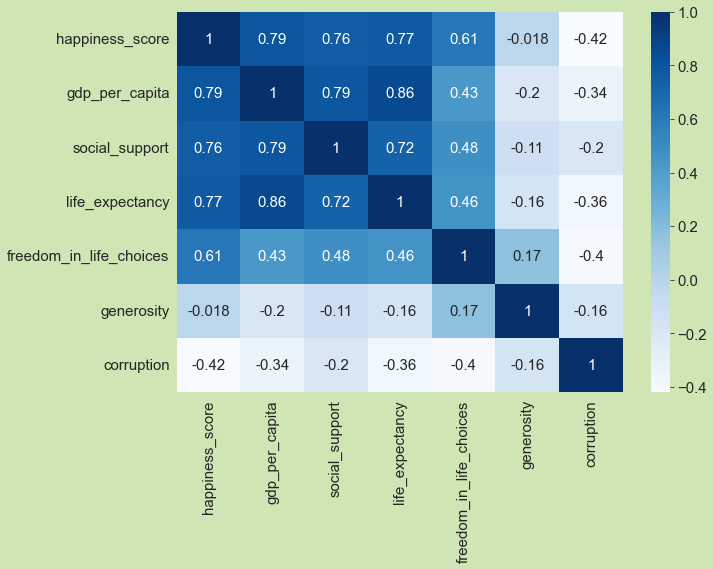

In [12]:
#plotting correlation

corr = happy_df.corr()
plt.rcParams['figure.figsize'] = (10, 7)
sns.heatmap(corr,annot = True, cmap = 'Blues')



The above heatmap shows the correlation between various aspects and how they are related to each other. The darker boxes shows that there is higher degree of correlation and the lighter boxes shows the lower degree of correlation among the factors we are considering. For instance we can understand from the heatmap that GDP per capita and happiness score are highly correlated on the other hand healthy life expectancy is least related to perceptions of corruption.


In [13]:
#checking the percentage of corruption region-wise
corruption = happy_df.groupby('regional_indicator')[['corruption']].mean()
corruption

,corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


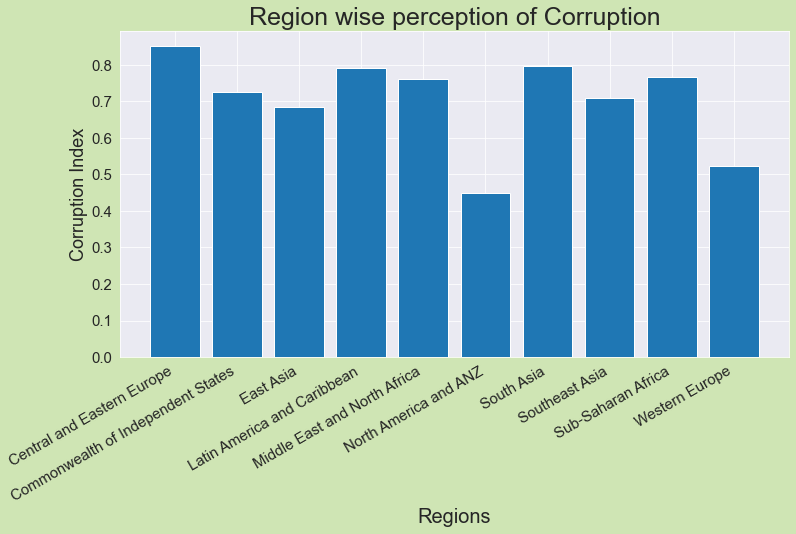

In [14]:
#plotting region-wise perception of corruption
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Region wise perception of Corruption', fontsize = 25)
plt.bar(corruption.index, corruption.corruption)
plt.xlabel('Regions', fontsize = 20)
plt.ylabel('Corruption Index', fontsize = 18)
plt.xticks(rotation = 30, ha = 'right')
plt.show()



The bar graph shown above tells us about the level of corruption in different regions of the world. We can witness the fact that Central and Eastern Europe comprising of 17 countries has higher corruption index and North America and ANZ region comprising of only 4 countries has the lowest corruption index.


In [15]:
#creating new variables for top 10 happiest countries & bottom 10
top10 = happy_df.head(10)
bottom10 = happy_df.tail(10)

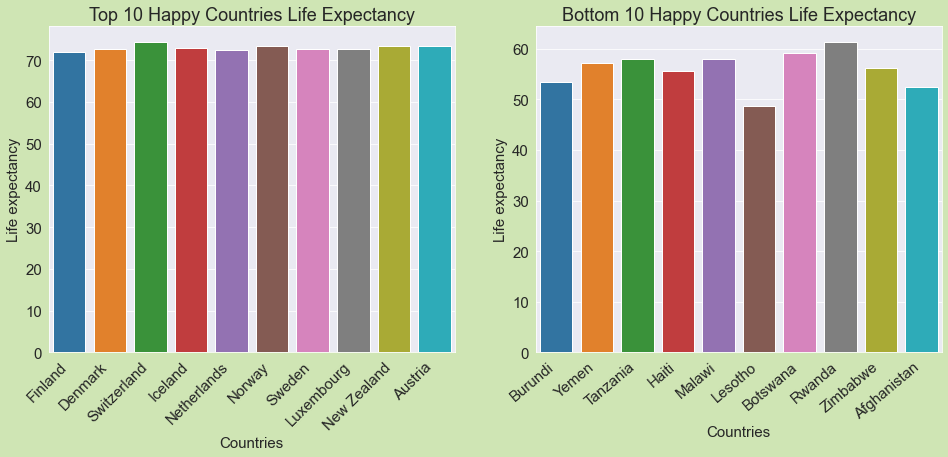

In [16]:
#plotting top 10 happiest countries and bottom 10 on bar chart
fig, axes = plt.subplots(1,2, figsize = (16,6))
xlabels = top10.country_name
axes[0].set_title('Top 10 Happy Countries Life Expectancy')
axes[0].set_xticklabels(xlabels, rotation = 45, ha = 'right')
sns.barplot(x = top10.country_name, y = top10.life_expectancy, ax= axes[0])
axes[0].set_xlabel('Countries')
axes[0].set_ylabel('Life expectancy')

axes[1].set_title('Bottom 10 Happy Countries Life Expectancy')
axes[1].set_xticklabels(xlabels, rotation = 40, ha = 'right')
sns.barplot(x = bottom10.country_name, y = bottom10.life_expectancy, ax= axes[1])
axes[1].set_xlabel('Countries')
axes[1].set_ylabel('Life expectancy')

plt.show()




The sub-plot shown above tells us about the life expectancy of top 10 happiest and least happiest countries. From the first sub-plot we can see that Switzerland has the highest life expectancy of more than 70 years and all the other countries also have life expectancy of 70 years.

The second sub-plot tells us that Rwanda has the highest life expectancy of 60 years and all the other countries have a life expectancy falling between 50 to 60 years but the Lesotho is the country having the least life expectancy of less than 50 years.


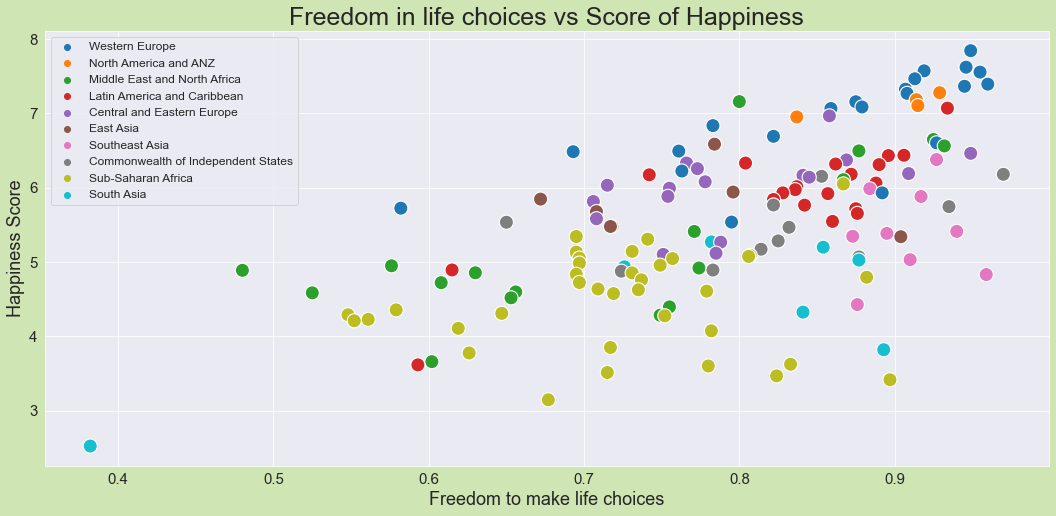

In [17]:
#plotting the freedom in life choices vs score of happiness in SCATTER PLOT
plt.rcParams['figure.figsize'] = (18,8)
sns.scatterplot(x=happy_df.freedom_in_life_choices, y = happy_df.happiness_score, hue = happy_df.regional_indicator, s = 200)
plt.title('Freedom in life choices vs Score of Happiness' , fontsize = 25)
plt.legend(loc = 'upper left', fontsize = 12)
plt.xlabel('Freedom to make life choices', fontsize = 18)
plt.ylabel('Happiness Score', fontsize = 18)
plt.show()



The scatter plot between Happiness Score and Freedom to make Life Choices shows how freedom to make life choices affect the happiness score. Most of the countries falling under Western Europe can be seen to have more freedom to make choices and has a greater happiness score. The countries falling under Latin America and ANZ region has a bit lower freedom of making choices which lowers the happiness score in comparison to Western Europe. Most of the countries under Sub-Saharan African region can be seen to have moderate freedom of making life choices thereby expeiencing the lower happiness score. So, we can conclude the fact that freedom to make choices is highly related to happiness score as the happiness score decreases in the regions where the freedom to make choices are lower.


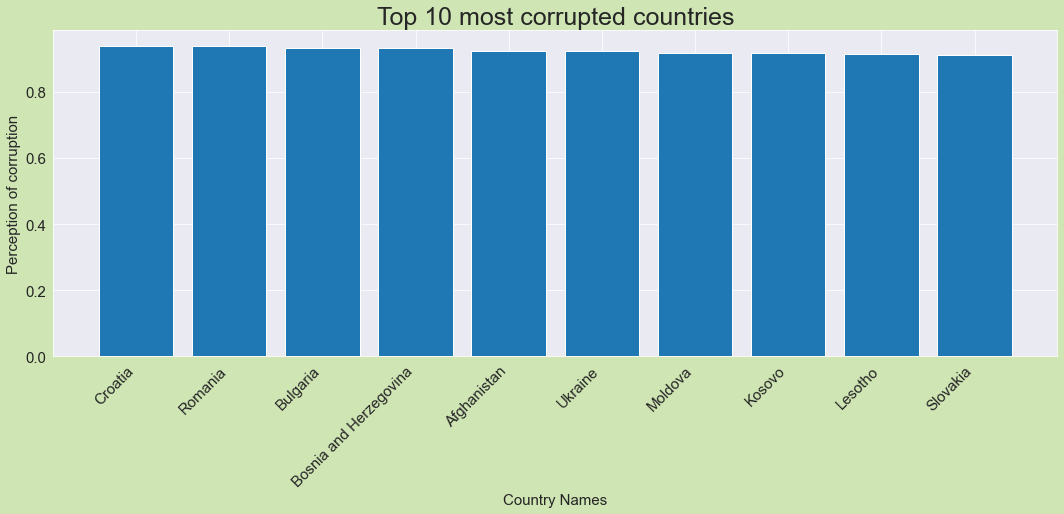

In [18]:
#top 10 most corrupted countries bar plot
country = happy_df.sort_values(by='corruption' , ascending=False).head(10)
plt.rcParams['figure.figsize'] = (18,6)
plt.title('Top 10 most corrupted countries', fontsize = 25)
plt.xlabel('Country Names')
plt.ylabel('Perception of corruption')
plt.xticks(rotation = 45, ha = 'right')
plt.bar(country.country_name, country.corruption)
plt.show()



The plot above shows the top 10 countries having the highest corruption index, Slovakia having the lowest corruption index and Crotia having the highest corruption index but more or less the corruption index amongst the top 10 countries is the same with the level above 0.8 points.


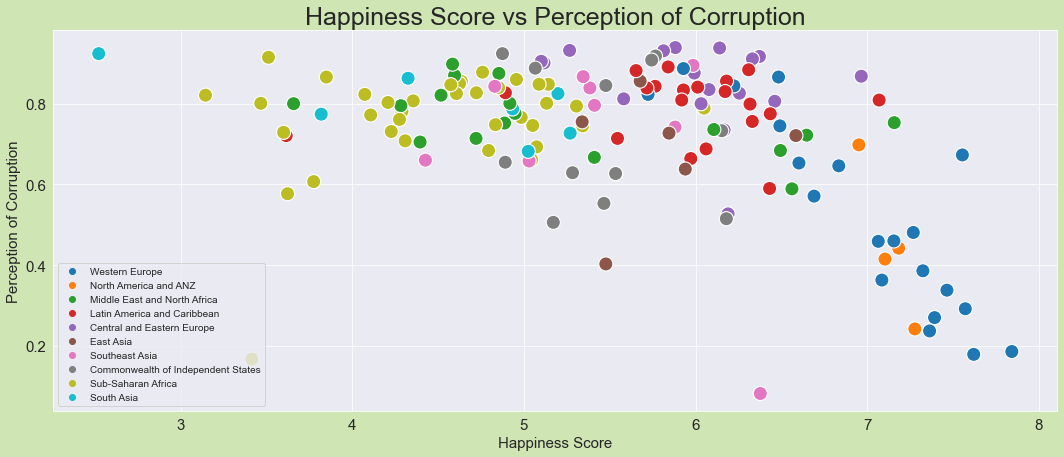

In [19]:
#corruption vs happiness score scatter plot
plt.rcParams['figure.figsize'] = (18,7)
plt.title('Happiness Score vs Perception of Corruption', fontsize = 25)
plt.xlabel('Happiness Score')
plt.ylabel('Perception of Corruption')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.corruption, hue = happy_df.regional_indicator, s = 200 )
plt.legend(loc = 'lower left', fontsize = 10)
plt.show()

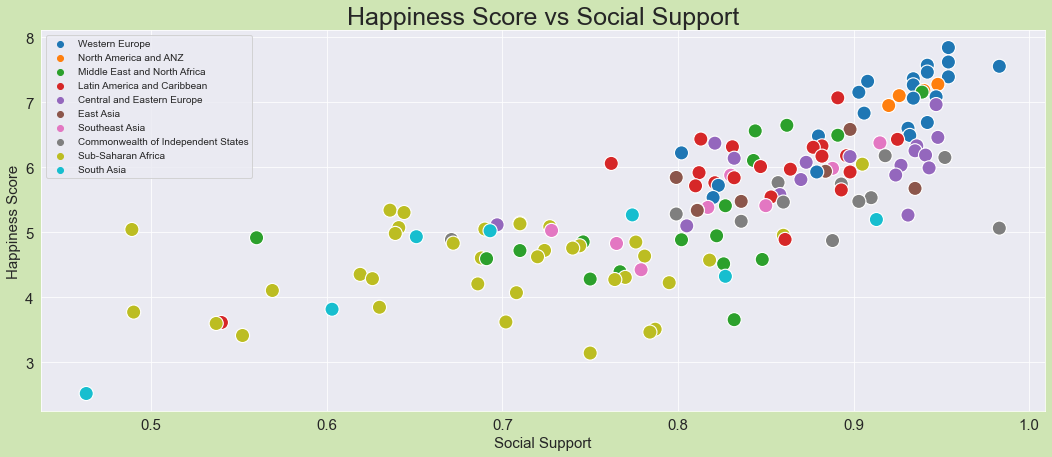

In [20]:
#happiness score vs social support scatter plot 
plt.rcParams['figure.figsize'] = (18,7)
plt.title('Happiness Score vs Social Support', fontsize = 25)
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
sns.scatterplot(x = happy_df.social_support, y = happy_df.happiness_score, hue = happy_df.regional_indicator, s = 200 )
plt.legend(loc = 'upper left', fontsize = 10)
plt.show()



The scatter graph above shows the relationship of happiness score to that of corruption.It can be seen that countries with lower perceptions of corruption have higher happiness score and vise-versa. There are few exception to it which we can consider as an outliar. It can be seen that countries in the Western Europe region has lower perceptions of corruption and are more happy as compared to other regions as the Happiness score is higher on the other hand Sub-Saharan Africa region has higher level of perceptions of corruptions thereby the countries falling under this region have lower Happiness score and are less happy.

From the Analysis shown above we can conclude this project in the following pointers:

    GDP per capita and happiness score are positively related to each other.

    Perceptions of corruption is negatively related to happiness score as the increase in one parameter leads to decrease in another parameter.

    Regions such as Central and Eastern Europe, Latin America and Caribbean, South Asia has the highest perceptions of corruption and Western Europe and North America and ANZ has the lowest perceptions of corruptions.

    Freedom to make choices and happiness score is also positively related to each other.

    Top 10 happiest countries have life expectancy of 70 years in comparison to bottom 10 least happiest countries which has a life expectancy of less than 60 years.

    Happier countries has lower corruption index in comparison to less happier countries.

    Singapore having the least perceptions of corruption, more freedom to make life choices and higher life expectancy is the happiest country in the world.

